<a href="https://colab.research.google.com/github/Salvoaf/labDeepLearning/blob/main/05_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning Basics: core components of Neural Networks

- Chapter 3, Section 1 of [Deep Learning with Python, 1st edition](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 

**Deep learning** is a branch of machine learning and consists in a
set of algorithms and techniques for learning in deep neural networks.

**Deep Neural Networks** consists of *many* hidden layers of information processing, in contrast with *shallow* Neural Networks. 

Here is an illustration reporting toy models of *shallow* and *deep* feedforward Neural Networks 
![non_deep_vs_deep](https://i.stack.imgur.com/OH3gI.png)

NNs key feature is the weighted interconnection of several simple Action Units in order to calculate complex functions

Feed-Forward neural networks represent a **universal approximation framework**: in fact, the *universal approximation theorem* states that:

>*for a big enough neural network, it always exists a parameters configuration that makes the network able to approximate any continuous function defined on a compact set of the nth-dimensional vector space over the real numbers.*


Obviously, it is not guaranteed that the training procedure will guide the
model to that parameters configuration.

## Mathematical Model
<img src="http://cs231n.github.io/assets/nn1/neuron_model.jpeg" width="400"/>

## Action Units: Activation Functions

The mathematical neuron model is a coarse approximation of the biological neuron. Its activation function takes the **weighted sum** of the inputs and generates an output signal.

-  an action unit receives input signal $x_i$ for each $i$ preceding unit;
- the output $y_k$ of the neuron $k$ is a non linear function $f$ of its weighted input:
$$y_k = f\Big(\sum_i(w_i\cdot x_i)+b\Big)$$

- the weight $w$ represents the strength of the synaptic connection between two action units. It is a learnable parameter and can result in an excitatory effect (positive weight) or inhibitory effect (negative weight);
- the bias $b$ is equivalent to a threshold;
- $f$ represents the activation function. This non-linearity allows a neural network to compute non linear functions of its input. The most common functions used are: Sigmoid, Hyperbolic Tangent, ReLU (Rectified Linear Unit);
- the output of a unit represents an input for following units.

A good activation function has several properties:

1. it is **continuous** and has an **infinite domain**, so to have an output number for *any* input;
2. it is **monotonic**. With a parabola, for example, we may have the same output value for two different input values;
3. it is **non-linear**: a NN with plenty of layers, but using only linear activation functions is equivalent to a NN with only one linear layer;
4. it should be **efficiently computable**.

The activation function characterizes the Neuron Unit. Some popular examples of activation function are presented in the following.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
x_vals = np.linspace(start=-10., stop=10., num=100)

**Step Function**: The trivial step function is seldom used in practice:
during the learning procedure it is desirable that small changes in input determine small changes in output

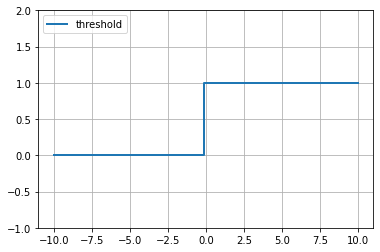

In [ ]:
plt.step(x_vals, [1 if x>0 else 0 for x in x_vals ], label='threshold', linewidth=2)
plt.ylim([-1,2])
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Sigmoid** guarantees the above mentioned property: output values between 0 and 1

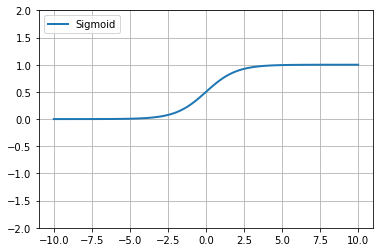

In [ ]:
y_sigmoid = tf.keras.activations.sigmoid(x_vals)
plt.plot(x_vals, y_sigmoid, label='Sigmoid', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Tanh** is similar to sigmoid, but its output is zero-centered: produces values between -1 and 1

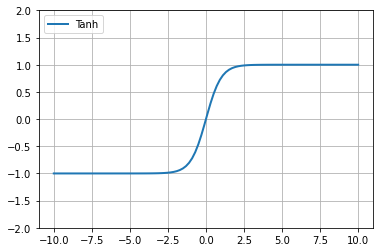

In [ ]:
y_tanh = tf.keras.activations.tanh(x_vals)
plt.plot(x_vals, y_tanh, label='Tanh', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.grid()
plt.show()

**ReLU** (Rectified Linear Unit) is the most popular choice for many deep architectures (mainly Convolutional Neural Networks)


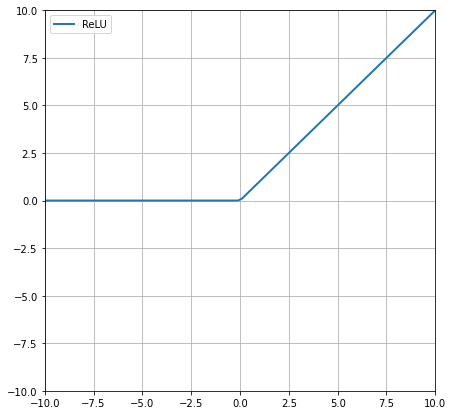

In [ ]:
plt.figure(figsize = (7,7))
y_relu = tf.keras.activations.relu(x_vals)
plt.plot(x_vals, y_relu, label='ReLU', linewidth=2)
plt.ylim([-10,10])
plt.xlim([-10,10])
plt.legend(loc='upper left')
plt.grid()
plt.show()

$f(x)=\max(0,x)$,
- it does not require expensive computation, by only thresholding the activations at zero; 
- it allows to avoid *vanishing gradient problem*: it is a phenomenon by which the gradient tends to get smaller as we move backward through the hidden layers. As a consequence, the update term for neurons in earlier layers will tend to zero, and learning will be very slow. The reason behind this phenomenon lays in the shape of the derivative of the activation function. Saturation of sigmoid units takes place both for small and big input, and indeed its derivative tends to zero. Thanks to the shape of its derivative, ReLU activation allows avoiding this problem.  
- it allows a sparse representation that, in turn, guarantees 
  - information disentangling: small changes of the input do not affect the features representation, as is the case of a dense representation.  A dense representation is highly entangled because almost any change in the input modifies most of the entries in the representation vector. Instead, if a representation is both sparse and robust to small input changes, the set of non-zero features is almost always roughly conserved by small changes of the input.
  - efficient variable-size representation: the model itself can reduce its representational power, i.e. the number of active neurons, depending on the input;
  - easier linear separability of representation,  because the information is represented in a high-dimensional space. 
- A drawback of these units is the fact that they do not learn when they have negative input: when too many units lie in this region, the effective capacity of the model could be dramatically reduced.

### Output units

The desired distribution in the output layer guides the choice of the output units.

For Multinoulli output distribution (n-way classification problem), softmax units are chosen. 
Given the input $z = wx + b$, the softmax activation is computed as:

  
$$softmax(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [0.7, 1.4, 3]
print(softmax(scores))
print(sum(softmax(scores)))

[0.07699453 0.15504795 0.76795752]
1.0


## Loss Function

The learning procedure aims at minimizing the loss function. It is chosen in conjunction with the task and the output units.

For example, when we deal with a **regression** task we may choose *Mean Squared Error* loss (MSE).
Given 

*   $x$ the input example, 
*   $a$ the related predicted value,
*   $y$ the related true label, 

the MSE is:

$$MSE = \frac{1}{N}\sum_{x}{(y-a)^2}$$

The most common cost function for **classification** is the *Cross-Entropy* between training data and model prediction. 

Consider for simplicity a binary classification problem: given 

*   $x$ the input example, 
*   $a$ the related output activation,
*   $y$ the related true label, 

the sum over the whole training set of size $N$, the cross-entropy is:

$$C = -\frac{1}{N}\sum_{x}[{y\ln(a) + (1 − y)\ln(1 − a)}]$$

When $y$ and $a$ have the same value, the cost function is zero.<br>
When $y$ and $a$ have different value, the cost function of the single example becomes
positive.



## Forward Propagation

During the forward step, the network accepts an input and computes the related output. In the figure at the top of this notebook, the information flows form left to right.
This step produces a scalar cost that is the task-related cost function (e.g. the cross-entropy) plus, possibly, a regularization term (we will see it in the next notebook).

## Backpropagation

- check [this post](http://neuralnetworksanddeeplearning.com/chap2.html)

Gradient descent algorithm requires that the **gradient of the scalar cost is calculated with respect to the weights of the network**. This step is efficiently accomplished by the back-propagation algorithm, which originates from the chain rule of calculus.

It provides an expression for the partial derivative $∂f(w)/∂w$ of the cost function $f$ with respect to any weight $w$ (or bias $b$) in the network: in other words, it expresses how a change in weights and biases affects the cost.


## Gradient Based Learning

When we train a neural network *from scratch*, the parameters (weights) of the network are randomly initialized. The optimization procedure aims to **minimize a cost function** by updating the weights in order to find a configuration that implements the desired function.

Optimization is achieved using Gradient Descent, an iterative method from calculus. Given $f(x)$ the cost function we want to minimize by altering the parameters $x$, and given $ε$ the **learning rate** that defines the size of the step, the method updates the parameters at a new iteration using the following formula:
$$∆x =- ε∇_x f (x) $$
$$x ← x + ∆x$$




<img src="https://miro.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" width="400"/>

Back-propagation allows to compute the gradient of the cost function of a single example, but theoretically the average value over the entire training set is needed. In practice, the gradient in the formula can be evaluated by averaging over $n$ examples, and this value identifies three possible scenarios:
- **online gradient descent**: optimization uses one example at a time; ($n = 1$)
- **deterministic gradient descent**: all the training examples are used; ($n = $Training set size)
- **minibatch** or **stochastic gradient descent**: a minibatch (or simply **batch**) of $n$ examples is used. ($1 < n < $Training set size)

Stochastic gradient descent is a common choice in most practical applications: higher values of $n$ guarantee a better estimate of the gradient, while lower values imply lower computation time. Actually, there are several hardware-related issues: the computation over a batch of n examples can be performed more efficiently that $n$ computations of single examples thanks to parallel computing. On
the other hand, big values of $n$ require a relevant amount of memory.

When the network performs the forward and backward pass on a single batch of examples, it is said to have executed a **step** or an **iteration**. 

An **epoch** of training is composed by a number of steps that allow the network to see all the training examples.

### Improving the optimization strategy 

Stochastic Gradient Descent is (\*was\*) the most popular method for optimization in DNN. Nevertheless several variants have been proposed in order to accelerate learning: **momentum** algorithm, for example, represents a common choice in convolutional neural networks. The update rule is:
$$∆x = α∆x − ε∇ x f (x)$$
$$x ← x + ∆x$$
The only difference between this formulation and the classic SGD
is given by the term $α∆x$: it can be considered a velocity term in the parameters space. The relationship between $α$ and $ε$ determines how much previous updates influence the current update, contributing to keep the direction of motion in the space parameter and avoiding oscillation. 



### Annealing the learning rate
In practice, it is common to implement a form of learning rate decay: after an initial coarse gradient descent, we may want to reach and settle in the global minimum with smaller and smaller steps in the parameter space.

Three popular implementations are step decay, exponential decay and $1/t$ decay.




### Per-parameter adaptive learning rate methods
The above-mentioned methods update the learning rate globally and equally for all the network parameters. Several algorithms have been proposed for adaptively tuning the learning rate per-parameters. Popular examples are **RMSprop** (Root Mean Square Propagation) and **Adam** (Adaptive Moment Estimation): they are already implemented and available in `tf.keras`.
We will not go into the details of their behavior, but we will frequently encounter some of them in practical applications.

A comparative description of the most popular optimization algorithm can be found [here](http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms).

## Basic regression: Predict fuel efficiency

In a *regression* problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

This example uses the Keras API. (Visit the Keras [tutorials](https://www.tensorflow.org/tutorials/keras) and [guides](https://www.tensorflow.org/guide/keras) to learn more.)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


## Get the data

First download and import the dataset using pandas:

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()
print(dataset['Origin'])

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 398, dtype: int64


### Clean the data

The dataset contains a few unknown values:

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Drop those rows to keep this initial tutorial simple:

In [ ]:
dataset = dataset.dropna()

The `"Origin"` column is categorical, not numeric. So the next step is to one-hot encode the values in the column with [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


### Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data

Review the joint distribution of a few pairs of columns from the training set.

The top row suggests that the fuel efficiency (MPG) is a function of all the other parameters. The other rows indicate they are functions of each other.

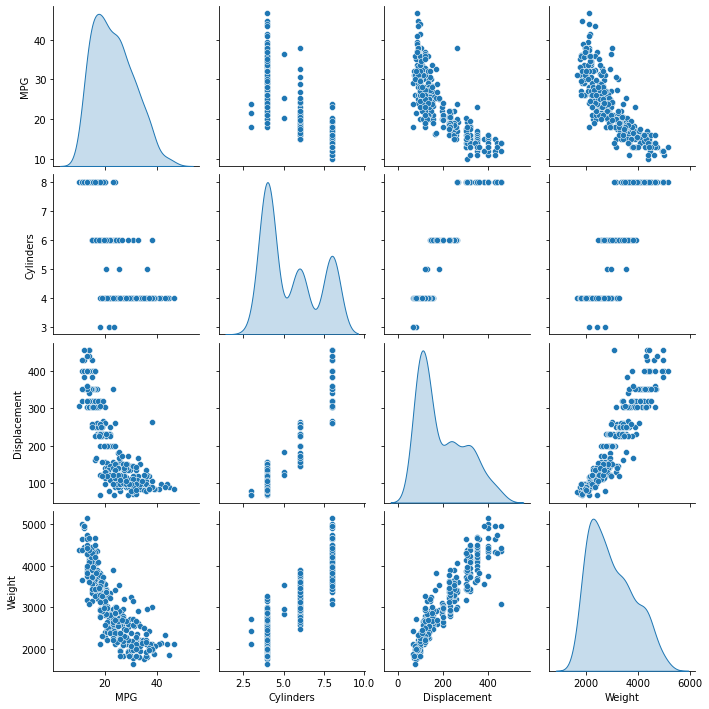

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

Let's also check the overall statistics. Note how each feature covers a very different range:

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


### Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are:

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity.

### The Normalization layer

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`:

In [ ]:
normalizer.adapt(np.array(train_features))

Calculate the mean and variance, and store them in the layer:

In [ ]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


When the layer is called, it returns the input data, with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


## Linear regression


Before building a deep neural network model, start with linear regression using one and several variables.

### Linear regression with one variable


Begin with a single-variable linear regression to predict `'MPG'` from `'Horsepower'`.

Training a model with `tf.keras` typically starts by defining the model architecture. Use a `tf.keras.Sequential` model, which [represents a sequence of steps](https://www.tensorflow.org/guide/keras/sequential_model).

There are two steps in your single-variable linear regression model:

- Normalize the `'Horsepower'` input features using the `tf.keras.layers.Normalization` preprocessing layer.
- Apply a linear transformation ($y = mx+b$) to produce 1 output using a linear layer (`tf.keras.layers.Dense`).

The number of _inputs_ can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First, create a NumPy array made of the `'Horsepower'` features. Then, instantiate the `tf.keras.layers.Normalization` and fit its state to the `horsepower` data:

In [ ]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

Build the Keras Sequential model:

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict `'MPG'` from `'Horsepower'`.

Run the untrained model on the first 10 'Horsepower' values. The output won't be good, but notice that it has the expected shape of `(10, 1)`:

In [ ]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 112ms/step


array([[ 1.172],
       [ 0.662],
       [-2.164],
       [ 1.644],
       [ 1.487],
       [ 0.584],
       [ 1.761],
       [ 1.487],
       [ 0.387],
       [ 0.662]], dtype=float32)

Once the model is built, configure the training procedure using the Keras `Model.compile` method. The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`mean_absolute_error`) and how (using the `tf.keras.optimizers.Adam`).

In [ ]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Use Keras `Model.fit` to execute the training for 100 epochs:

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.91 s, sys: 185 ms, total: 4.09 s
Wall time: 5.55 s


Visualize the model's training progress using the stats stored in the `history` object:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.805966,4.203640,95
96,3.803347,4.186512,96
97,3.809595,4.208941,97
98,3.805055,4.178182,98
99,3.807282,4.204418,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

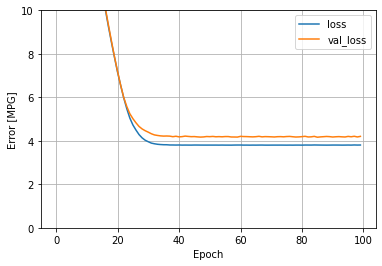

In [ ]:
plot_loss(history)

Collect the results on the test set for later:

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

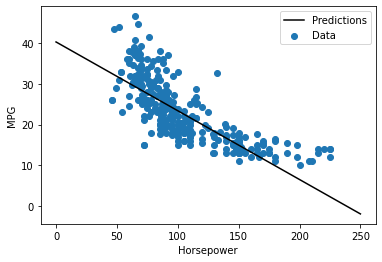

In [ ]:
plot_horsepower(x, y)

### Linear regression with multiple inputs

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same $y = mx+b$ except that $m$ is a matrix and $b$ is a vector.

Create a two-step Keras Sequential model again with the first layer being `normalizer` (`tf.keras.layers.Normalization(axis=-1)`) you defined earlier and adapted to the whole dataset:

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you call `Model.predict` on a batch of inputs, it produces `units=1` outputs for each example:

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 127ms/step


array([[-0.383],
       [-0.31 ],
       [ 1.502],
       [-0.867],
       [-1.141],
       [-0.421],
       [-1.441],
       [-0.775],
       [-0.113],
       [-0.698]], dtype=float32)

When you call the model, its weight matrices will be built—check that the `kernel` weights (the $m$ in $y=mx+b$) have a shape of `(9, 1)`:

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.126],
       [-0.352],
       [ 0.364],
       [ 0.738],
       [-0.368],
       [-0.134],
       [ 0.498],
       [ 0.491],
       [ 0.595]], dtype=float32)>

Configure the model with Keras `Model.compile` and train with `Model.fit` for 100 epochs:

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.17 s, sys: 173 ms, total: 5.34 s
Wall time: 10.9 s


Using all the inputs in this regression model achieves a much lower training and validation error than the `horsepower_model`, which had one input:

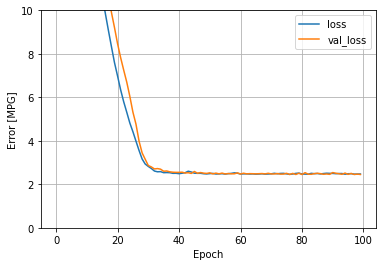

In [ ]:
plot_loss(history)

Collect the results on the test set for later:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## Regression with a deep neural network (DNN)

In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer, as before (with `horsepower_normalizer` for a single-input model and `normalizer` for a multiple-input model).
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

Both models will use the same training procedure, so the `compile` method is included in the `build_and_compile_model` function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### Regression using a DNN and a single input

Create a DNN model with only `'Horsepower'` as input and `horsepower_normalizer` (defined earlier) as the normalization layer:

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

This model has quite a few more trainable parameters than the linear models:

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model with Keras `Model.fit`:

In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.95 s, sys: 225 ms, total: 5.18 s
Wall time: 11.3 s


This model does slightly better than the linear single-input `horsepower_model`:

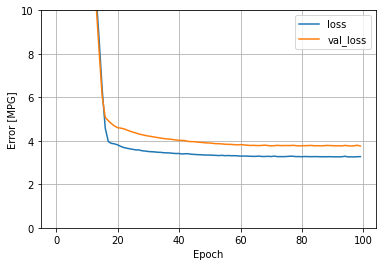

In [ ]:
plot_loss(history)

If you plot the predictions as a function of `'Horsepower'`, you should notice how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


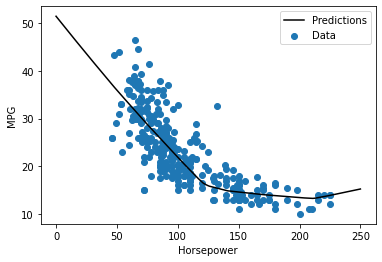

In [ ]:
plot_horsepower(x, y)

Collect the results on the test set for later:

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

### Regression using a DNN and multiple inputs

Repeat the previous process using all the inputs. The model's performance slightly improves on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.19 s, sys: 194 ms, total: 4.38 s
Wall time: 4.15 s


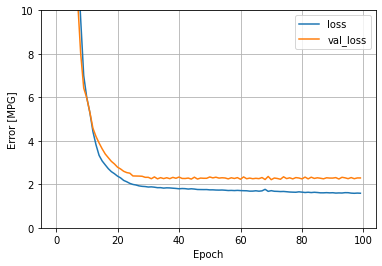

In [ ]:
plot_loss(history)

Collect the results on the test set:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

## Performance

Since all models have been trained, you can review their test set performance:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.647241
linear_model,2.508804
dnn_horsepower_model,2.941123
dnn_model,1.711595


These results match the validation error observed during training.

### Make predictions

You can now make predictions with the `dnn_model` on the test set using Keras `Model.predict` and review the loss:

3/3 [==============================] - 0s 4ms/step


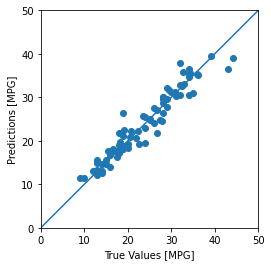

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It appears that the model predicts reasonably well.

Now, check the error distribution:

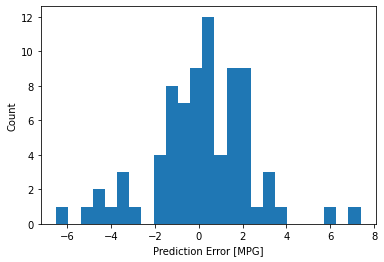

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

If you're happy with the model, save it for later use with `Model.save`:

In [ ]:
dnn_model.save('dnn_model')

If you reload the model, it gives identical output:

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.647241
linear_model,2.508804
dnn_horsepower_model,2.941123
dnn_model,1.711595
reloaded,1.711595


## Conclusion


This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

- Mean squared error (MSE) (`tf.keras.losses.MeanSquaredError`) and mean absolute error (MAE) (`tf.keras.losses.MeanAbsoluteError`) are common loss functions used for regression problems. MAE is less sensitive to outliers. Different loss functions are used for classification problems.
- Similarly, evaluation metrics used for regression differ from classification.
- When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
- Overfitting is a common problem for DNN models, though it wasn't a problem for this tutorial.

## Exercise

The possum dataset (*possum.csv*) consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland.

*   Can we use total length to predict a possum's head length?
*   Which possum body dimensions are most correlated with age and sex?
*   Can we classify a possum's sex by its body dimensions and location?
*   Can we predict a possum's trapping location from its body dimensions?

